In [1]:
import os
import numpy as np
from graph_tool import Graph, GraphView
from graph_tool.draw import graph_draw
from viz_helpers import default_plot_setting

In [2]:
fig_dirname = 'figs/slides'


In [3]:
import numpy as np


def normalize(rgb):
    return tuple(np.array(rgb) / 255) + (1.0, )

COLOR_RED = normalize([178, 34, 34])
COLOR_BLUE = normalize([31, 120, 180])
COLOR_GREY = normalize([220, 220, 220])
COLOR_BLACK = normalize([37, 37, 37])
COLOR_YELLOW = normalize([255, 217, 47])
COLOR_WHITE = normalize([255, 255, 255])
COLOR_ORANGE = normalize([252, 120, 88])
COLOR_PINK = normalize([255, 20, 147])
COLOR_GREEN = normalize([50, 205, 50])


def default_setting(g):
    vertex_text = g.new_vertex_property('string')
    for i in range(g.num_vertices()):
        vertex_text[i] = str(i)

    vertex_fill_color = g.new_vertex_property('vector<float>')
    vertex_fill_color.set_value(COLOR_RED)

    edge_color = g.new_edge_property('vector<float>')
    edge_color.set_value(COLOR_GREY)

    edge_text = g.new_edge_property('string')
    edge_text.set_value('')

    eorder = g.new_edge_property('int')
    eorder.set_value(0)

    edge_end_marker = g.new_edge_property('string')
    edge_end_marker.set_value('arrow')
    return {'vertex_text': vertex_text,
            'vertex_fill_color': vertex_fill_color,
            'vertex_font_size': 32,
            'vertex_size': 64,
            'eorder': eorder,
            'edge_text': edge_text,
            'edge_color': edge_color,
            'edge_font_size': 64,
            'edge_text_distance': 8,
            'edge_end_marker': edge_end_marker}


In [4]:
"""
        4   8  
      /   /
    1 - 5 - 9
  /   \----\
0 - 2   6   10
  \   / 
    3 - 7 - 11

"""

'\n        4   8  \n      /   /\n    1 - 5 - 9\n  /   \\----0 - 2   6   10\n  \\   / \n    3 - 7 - 11\n\n'

In [5]:
g = Graph(directed=False)
g.add_vertex(12)
graph_edges = [
    (0, 1), (0, 2), (0, 3),
    (1, 4), (1, 5), (1, 10),
    (3, 6), (3, 7), (7, 11),
    (5, 8), (5, 9), (1, 2), (2, 3),
    (5, 4), (7, 6), (11, 6), (9, 2), 
]
g.add_edge_list(graph_edges)
# g.add_edge_list([(v, u) for u, v in graph_edges])

In [6]:
active_edges = [(0, 1), (0, 3), (1, 4), (1, 5), (3, 6), (3, 7), (5, 9), (1, 10)]

In [7]:
pos_data = [(0, -1), (1, -2), (1, -1), (1, 0), (2, -3), (2, -2), (2, -1), (2, 0), (3, -3), (3, -2), (3, -1), (3, 0)]
pos = g.new_vertex_property('vector<float>')
for i, xy in enumerate(pos_data):
    pos[i] = xy

In [8]:
infected = [0, 1, 3, 4, 5, 6, 7, 9, 10]
time = [0, 1, 1, 2, 2, 2, 2, 3, 3]

In [9]:

if not os.path.exists(fig_dirname):
    os.makedirs(fig_dirname)

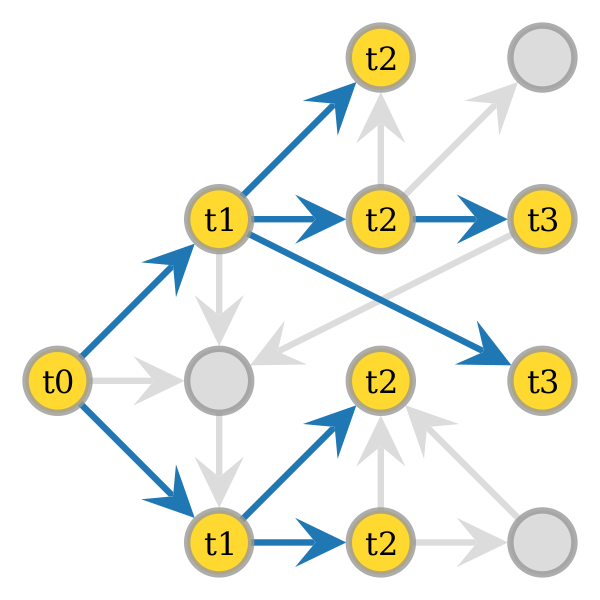

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7f154835dd68, at 0x7f154835dc50>

In [24]:
dg = GraphView(g, directed=True)
s = default_setting(dg)
s['vertex_text'].set_value('')
s['vertex_fill_color'].set_value(COLOR_GREY)
for i, t in zip(infected, time):
    s['vertex_text'][i] = 't{}'.format(t)
    s['vertex_fill_color'][i] = COLOR_YELLOW
for u, v in active_edges:
    s['edge_color'][dg.edge(u, v)] = COLOR_BLUE
graph_draw(dg, pos, **s, output='{}/ground-truth.pdf'.format(fig_dirname))

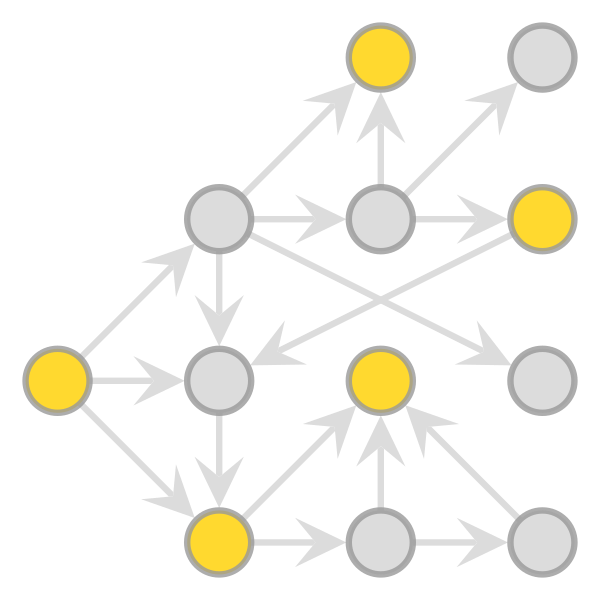

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7f154835dd68, at 0x7f154835dc50>

In [11]:
# idx = np.random.permutation(len(infected))[:4]
# idx = list(idx) + [0]
# infected = [0, 1, 3, 4, 5, 6, 7, 9, 10]
idx = [0, 2, 3, 5, 7]
observed_nodes = np.array(infected)[idx]
obs_time = np.array(time)[idx]

dg = GraphView(g, directed=True)
s = default_setting(dg)
s['vertex_text'].set_value('')
s['vertex_fill_color'].set_value(COLOR_GREY)
for i, t in zip(observed_nodes, obs_time):
    # s['vertex_text'][i] = 't{}'.format(t)
    s['vertex_fill_color'][i] = COLOR_YELLOW
graph_draw(dg, pos, **s, output='{}/observation.pdf'.format(fig_dirname))

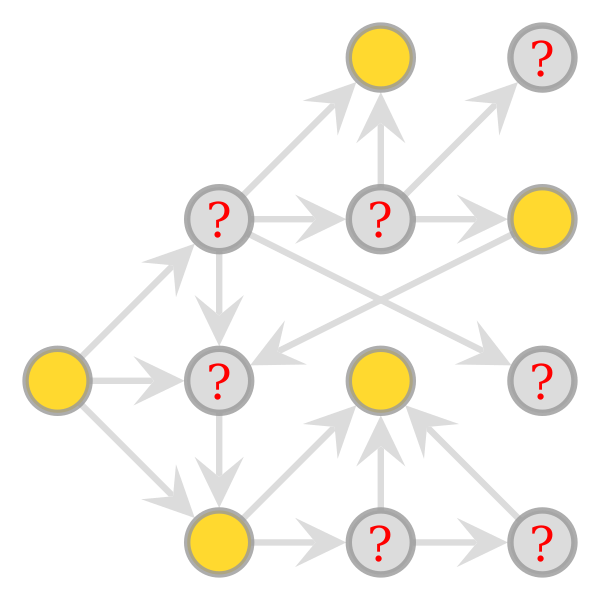

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7f154835dd68, at 0x7f154835dc50>

In [23]:
# idx = np.random.permutation(len(infected))[:4]
# idx = list(idx) + [0]
# infected = [0, 1, 3, 4, 5, 6, 7, 9, 10]
idx = [0, 2, 3, 5, 7]
observed_nodes = np.array(infected)[idx]
hidden_nodes = set(np.arange(g.num_vertices())) - set(observed_nodes)
obs_time = np.array(time)[idx]

dg = GraphView(g, directed=True)
s = default_setting(dg)
s['vertex_text'].set_value('')
s['vertex_fill_color'].set_value(COLOR_GREY)
for i in observed_nodes:
    # s['vertex_text'][i] = 't{}'.format(t)
    s['vertex_fill_color'][i] = COLOR_YELLOW

for i in hidden_nodes:
    s['vertex_text'][i] = '?'
s['vertex_font_size'] = 48
s['vertex_text_color'] = 'red'

graph_draw(dg, pos,
           **s, output='{}/question.pdf'.format(fig_dirname))

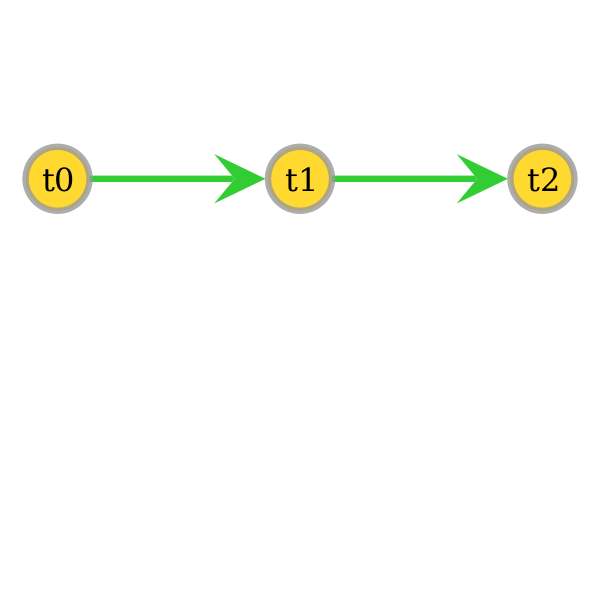

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7f06581e4dd8, at 0x7f06581e4c50>

In [70]:
path = Graph(directed=True)
path.add_vertex(3)
path.add_edge_list([(0, 1), (1, 2)])
time = [1, 2, 3]
pos = path.new_vertex_property('vector<float>')
pos[0] = (0, 0)
pos[1] = (1, 0)
pos[2] = (2, 0)

labels = ['t0', 't1', 't2']
s = default_setting(path)
s['vertex_text'].set_value('')
s['vertex_fill_color'].set_value(COLOR_YELLOW)
for i, l in enumerate(labels):
    s['vertex_text'][i] = l
s['edge_color'].set_value(COLOR_GREEN)
graph_draw(path, pos, **s, output='{}/order-respecting-path-right.pdf'.format(fig_dirname))

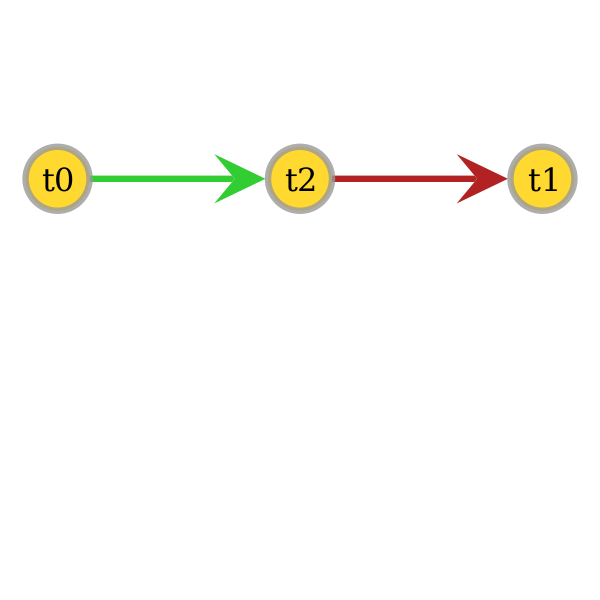

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7f06582d2b70, at 0x7f065829e9e8>

In [69]:
path = Graph(directed=True)
path.add_vertex(3)
path.add_edge_list([(0, 1), (1, 2)])
time = [1, 3, 2]
pos = path.new_vertex_property('vector<float>')
pos[0] = (0, 0)
pos[1] = (1, 0)
pos[2] = (2, 0)

labels = ['t0', 't2', 't1']
s = default_setting(path)
s['vertex_text'].set_value('')
s['vertex_fill_color'].set_value(COLOR_YELLOW)
for i, l in enumerate(labels):
    s['vertex_text'][i] = l
s['edge_color'].set_value(COLOR_GREEN)
# s['edge_color'].set_value(COLOR_RED)
s['edge_color'][path.edge(1, 2)] = COLOR_RED
graph_draw(path, pos, **s, output='{}/order-respecting-path-wrong.pdf'.format(fig_dirname))

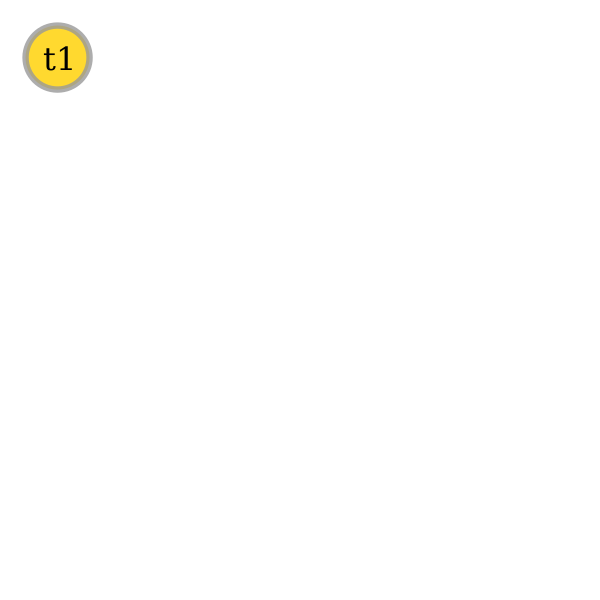

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7f0658cdda20, at 0x7f0658ce35c0>

In [9]:
path = Graph(directed=True)
path.add_vertex(1)
time = [1]
pos = path.new_vertex_property('vector<float>')
pos[0] = (0, 0)

labels = ['t1']
s = default_setting(path)
s['vertex_text'].set_value('')
s['vertex_fill_color'].set_value(COLOR_YELLOW)
for i, l in enumerate(labels):
    s['vertex_text'][i] = l
graph_draw(path, pos, **s, output='{}/infected-node.pdf'.format(fig_dirname))

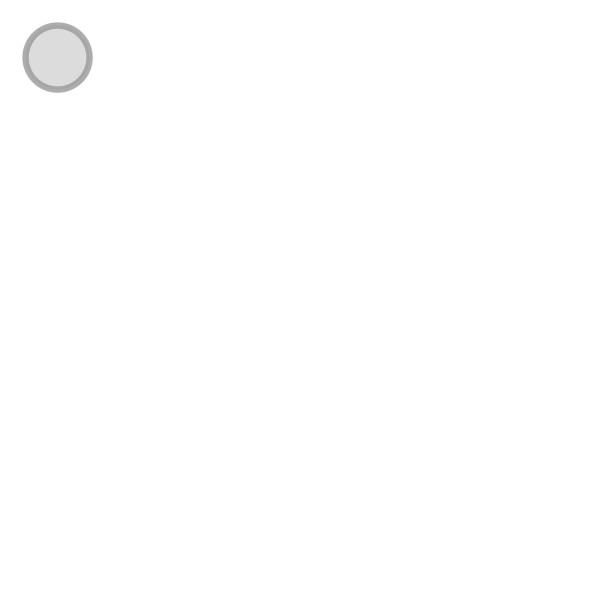

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7f0658b10fd0, at 0x7f0658b10d30>

In [10]:
path = Graph(directed=True)
path.add_vertex(1)
time = [1]
pos = path.new_vertex_property('vector<float>')
pos[0] = (0, 0)

labels = ['']
s = default_setting(path)
s['vertex_text'].set_value('')
s['vertex_fill_color'].set_value(COLOR_GREY)
for i, l in enumerate(labels):
    s['vertex_text'][i] = l
graph_draw(path, pos, **s, output='{}/uninfected-node.pdf'.format(fig_dirname))